In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [16]:
#Mount google drive 
from google.colab import drive
drive.mount('/content/drive')

#directory path where the age data set is stored --TO MODIFY
dir_path = '/content/drive/MyDrive/Summer 2022/'
#file name --TO MODIFY
file_name = 'AgeDataset-V1.csv'
os.listdir(dir_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['AgeDataset-V1.csv']

In [146]:
dataset = pd.read_csv(dir_path + file_name)
#dataset.head(20)
df = dataset
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


# Understanding Data Distribution

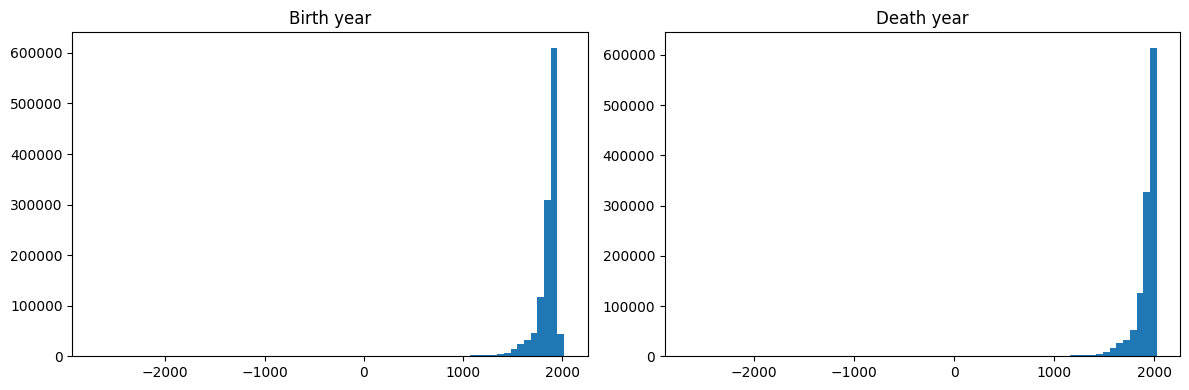

In [91]:
# Plot Histogram to understand the distribution of numeric attributes

plt.rcParams.update({'figure.figsize':(12,4), 'figure.dpi':100})
plt.rcParams["figure.autolayout"] = True
x1 = df
x2 = df
fig, axes = plt.subplots(1, 2)
x1.hist('Birth year', bins=70, ax=axes[0])
x2.hist('Death year', bins=70, ax=axes[1])
axes[0].grid(None)
axes[1].grid(None)
plt.show()

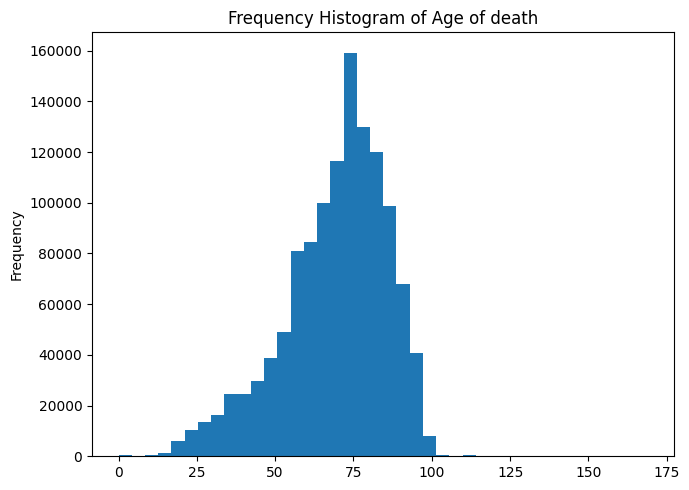

In [92]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
x = df['Age of death']
plt.hist(x, bins=40)
plt.gca().set(title='Frequency Histogram of Age of death', ylabel='Frequency');

In [147]:
df.describe().round()

,Birth year,Death year,Age of death
count,1223009.0,1223008.0,1223008.0
mean,1845.0,1914.0,69.0
std,148.0,152.0,17.0
min,-2700.0,-2659.0,0.0
25%,1828.0,1895.0,60.0
50%,1887.0,1955.0,72.0
75%,1918.0,1994.0,81.0
max,2016.0,2021.0,169.0


# **Preliminary Data preprocessing**

In [148]:
idx = df.index[df['Death year'].isnull()]
print(df.shape)
df = df.drop(index=idx)
print(df.shape)
idx = df.index[df['Birth year']>1700]
df = df.drop(index=idx)
print(df.shape)

(1223009, 10)
(1223008, 10)
(108991, 10)


In [149]:
idx = df.index[df['Age of death'].isnull()]
print(df.shape)
df = df.drop(index=idx)
print(df.shape)

(108991, 10)
(108991, 10)


In [150]:
df['Occupation'].value_counts()

Artist                 18816
Politician             16941
Religious figure       10748
Researcher              5116
Military personnel      4337
                       ...  
Goldsmith; engraver        1
Governor; explorer         1
Arabist                    1
Brother; sacristan         1
British settler            1
Name: Occupation, Length: 1609, dtype: int64

In [151]:
# Grabbing First Occupation
occ_df = df
occ_df['Occupation'] = occ_df['Occupation'].str.split(';').str[0].str.strip()
occ_df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0
11,Q307,Galileo Galilei,"Italian mathematician, physicist, philosopher ...",Male,Grand Duchy of Tuscany; Duchy of Florence,Astronomer,1564,1642.0,NaN,78.0
13,Q346,Louis IX of France,king of France,Male,France,Ruler,1214,1270.0,natural causes,56.0
15,Q353,Blanche of Castile,"Spanish princess and saint, queen consort of F...",Female,Kingdom of Castile,Regent,1188,1252.0,NaN,64.0


In [152]:
idx = occ_df.index[occ_df['Occupation'].isnull()]
print(occ_df.shape)
occ_df = occ_df.drop(index=idx)
print(occ_df.shape)

(108991, 10)
(77394, 10)


In [153]:
occ_df['Occupation'].value_counts()

Artist                18816
Politician            16941
Religious figure      10748
Researcher             5116
Military personnel     4337
                      ...  
Chancery                  1
Constable                 1
Tanner                    1
Dame                      1
British settler           1
Name: Occupation, Length: 745, dtype: int64

In [154]:
occ2_df = occ_df

In [13]:
#!pip install -U pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=01b37187599da5b28d18c4cdf3a02c9b3509e832e8fb0deb42c7a823fa4c06f0
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [155]:
#Identifying top 10 Occupations

from pandasql import sqldf

query = '''
SELECT Occupation, COUNT(Occupation) AS count
FROM occ_df
GROUP BY Occupation
ORDER BY count DESC
LIMIT 10
'''
sqldf(query)

,Occupation,count
0,Artist,18816
1,Politician,16941
2,Religious figure,10748
3,Researcher,5116
4,Military personnel,4337
5,Aristocrat,2720
6,Physician,1115
7,Architect,1067
8,Jurist,905
9,Judge,617


In [156]:
# Renaming column names to work with SQL
occ_df.rename({'Birth year': 'birthYear', 'Death year': 'deathYear', 'Manner of death':'mannerOfDeath', 'Age of death':'ageOfDeath'}, axis=1, inplace=True)
occ_df.head()

,Id,Name,Short description,Gender,Country,Occupation,birthYear,deathYear,mannerOfDeath,ageOfDeath
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0
11,Q307,Galileo Galilei,"Italian mathematician, physicist, philosopher ...",Male,Grand Duchy of Tuscany; Duchy of Florence,Astronomer,1564,1642.0,NaN,78.0
13,Q346,Louis IX of France,king of France,Male,France,Ruler,1214,1270.0,natural causes,56.0
15,Q353,Blanche of Castile,"Spanish princess and saint, queen consort of F...",Female,Kingdom of Castile,Regent,1188,1252.0,NaN,64.0


In [102]:
# Identifying the common age of death across the top 10 Occupations

query = '''

WITH new_view AS

(SELECT Occupation, ageOfDeath, COUNT(ageOfDeath) AS age_ct, COUNT(Occupation) AS oc_ct
FROM occ_df
GROUP BY  Occupation, ageOfDeath
ORDER BY oc_ct DESC)

SELECT Occupation, ageOfDeath AS most_common_ageOfDeath, MAX(age_ct) AS count
FROM new_view
GROUP BY Occupation
ORDER BY oc_ct DESC
LIMIT 10

'''

sqldf(query)

,Occupation,most_common_ageOfDeath,count
0,Artist,70.0,666
1,Politician,70.0,473
2,Religious figure,60.0,340
3,Researcher,70.0,203
4,Military personnel,63.0,115
5,Aristocrat,60.0,71
6,Physician,70.0,41
7,Architect,64.0,39
8,Jurist,70.0,38
9,Judge,64.0,30


In [105]:
# Grabbing First Manner of death
occ_df['mannerOfDeath'] = occ_df['mannerOfDeath'].str.split(';').str[0].str.strip()
occ_df.head()

,Id,Name,Short description,Gender,Country,Occupation,birthYear,deathYear,mannerOfDeath,ageOfDeath
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0
11,Q307,Galileo Galilei,"Italian mathematician, physicist, philosopher ...",Male,Grand Duchy of Tuscany; Duchy of Florence,Astronomer,1564,1642.0,NaN,78.0
13,Q346,Louis IX of France,king of France,Male,France,Ruler,1214,1270.0,natural causes,56.0
15,Q353,Blanche of Castile,"Spanish princess and saint, queen consort of F...",Female,Kingdom of Castile,Regent,1188,1252.0,NaN,64.0


In [108]:
top_causes = occ_df.groupby('mannerOfDeath').size().reset_index(name = 'count')
top_causes = top_causes.sort_values(by = 'count', ascending = False).iloc[:20]
top_causes = top_causes.iloc[:6]
print(top_causes)

         mannerOfDeath  count
3   capital punishment    775
11      natural causes    689
7             homicide    518
16             suicide    213
2             accident    140
4      death in battle     35


In [109]:
query = '''

WITH new_view AS

(SELECT Occupation, mannerOfDeath, COUNT(mannerOfDeath) AS cause_ct
FROM occ_df
GROUP BY Occupation, mannerOfDeath
ORDER BY cause_ct DESC)

SELECT Occupation, mannerOfDeath AS common_cause, MAX(cause_ct) AS count
FROM new_view
GROUP BY Occupation
ORDER BY count DESC
LIMIT 10
'''

sqldf(query)

,Occupation,common_cause,count
0,Politician,capital punishment,301
1,Artist,natural causes,156
2,Military personnel,capital punishment,107
3,Religious figure,capital punishment,69
4,Researcher,natural causes,59
5,Aristocrat,natural causes,48
6,Monarch,homicide,30
7,Samurai,suicide,27
8,Ruler,natural causes,18
9,Sovereign,natural causes,18


In [113]:
# Common death ages for the top 6 death causes:
query = '''
WITH new_view AS
    (SELECT mannerOfDeath, ageOfDeath, COUNT(ageOfDeath) AS ct
    FROM occ_df
    WHERE mannerOfDeath IN ('natural causes', 'suicide', 'accident', 'homicide', 'capital punishment', 'death in battle')
    GROUP BY mannerOfDeath, ageOfDeath
    )
SELECT mannerOfDeath, ageOfDeath AS common_ageOfDeath, MAX(ct) AS count
FROM new_view
GROUP BY mannerOfDeath
ORDER BY count DESC
'''
sqldf(query)

,mannerOfDeath,common_ageOfDeath,count
0,capital punishment,46.0,25
1,natural causes,60.0,21
2,homicide,27.0,15
3,accident,44.0,7
4,suicide,25.0,7
5,death in battle,30.0,2


In [192]:
data = pd.DataFrame(occ2_df.groupby(['Occupation', 'mannerOfDeath']).size().reset_index(name = 'count').sort_values(by = 'count', ascending = False))

In [173]:
top_causes

,mannerOfDeath,count
3,capital punishment,775
11,natural causes,689
7,homicide,518
16,suicide,213
2,accident,140
4,death in battle,35


In [193]:
cause_occ2_df = data.loc[(data['mannerOfDeath']=='capital punishment')|(data['mannerOfDeath']=='natural causes')|(data['mannerOfDeath']=='homicide')
|(data['mannerOfDeath']=='suicide')|(data['mannerOfDeath']=='accident')|(data['mannerOfDeath']=='death in battle')]
cause_occ2_df.head()

,Occupation,mannerOfDeath,count
41,Politician,capital punishment,272
46,Politician,homicide,201
50,Politician,natural causes,168
17,Artist,natural causes,156
28,Military personnel,capital punishment,101


Text(0.5, 1.0, 'Cause of Death by Top Occupation')

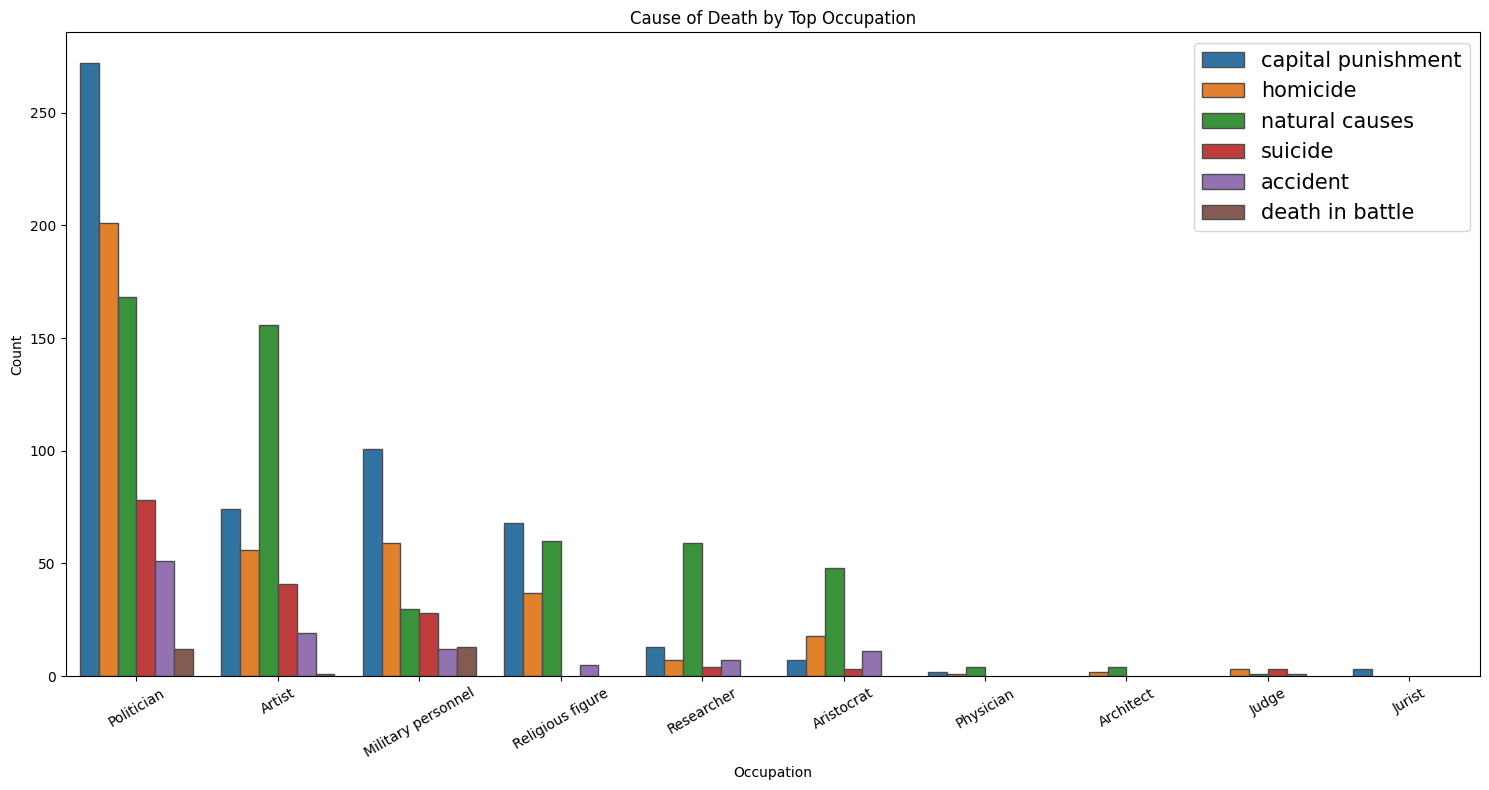

In [195]:
fig = plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'Occupation', y = 'count', hue ='mannerOfDeath', data = cause_occ2_df, edgecolor=".3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.legend(fontsize = 15, loc = 'upper right')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Cause of Death by Top Occupation')

In [157]:
occ2_df = occ_df.loc[(occ_df['Occupation']=='Artist')|(occ_df['Occupation']=='Politician')|(occ_df['Occupation']=='Religious figure')
                        |(occ_df['Occupation']=='Aristocrat')|(occ_df['Occupation']=='Researcher')|(occ_df['Occupation']=='Physician')
                        |(occ_df['Occupation']=='Military personnel')|(occ_df['Occupation']=='Architect')|(occ_df['Occupation']=='Jurist')|(occ_df['Occupation']=='Judge')]

In [177]:
occ2_df['Occupation'].value_counts()

Artist                18816
Politician            16941
Religious figure      10748
Researcher             5116
Military personnel     4337
Aristocrat             2720
Physician              1115
Architect              1067
Jurist                  905
Judge                   617
Name: Occupation, dtype: int64

In [159]:
occ2_df.head()

,Id,Name,Short description,Gender,Country,Occupation,birthYear,deathYear,mannerOfDeath,ageOfDeath
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0
29,Q498,"Ulrich Frédéric Woldemar, Comte de Lowendal",German-born French soldier and statesmen (1700...,Male,Denmark; Russian Empire; Kingdom of France; El...,Politician,1700,1755.0,NaN,55.0
42,Q590,Luís de Camões,Portuguese poet,Male,NaN,Artist,1524,1580.0,NaN,56.0
43,Q619,Nicolaus Copernicus,"Renaissance-era mathematician, astronomer, and...",Male,Kingdom of Poland,Researcher,1473,1543.0,natural causes,70.0


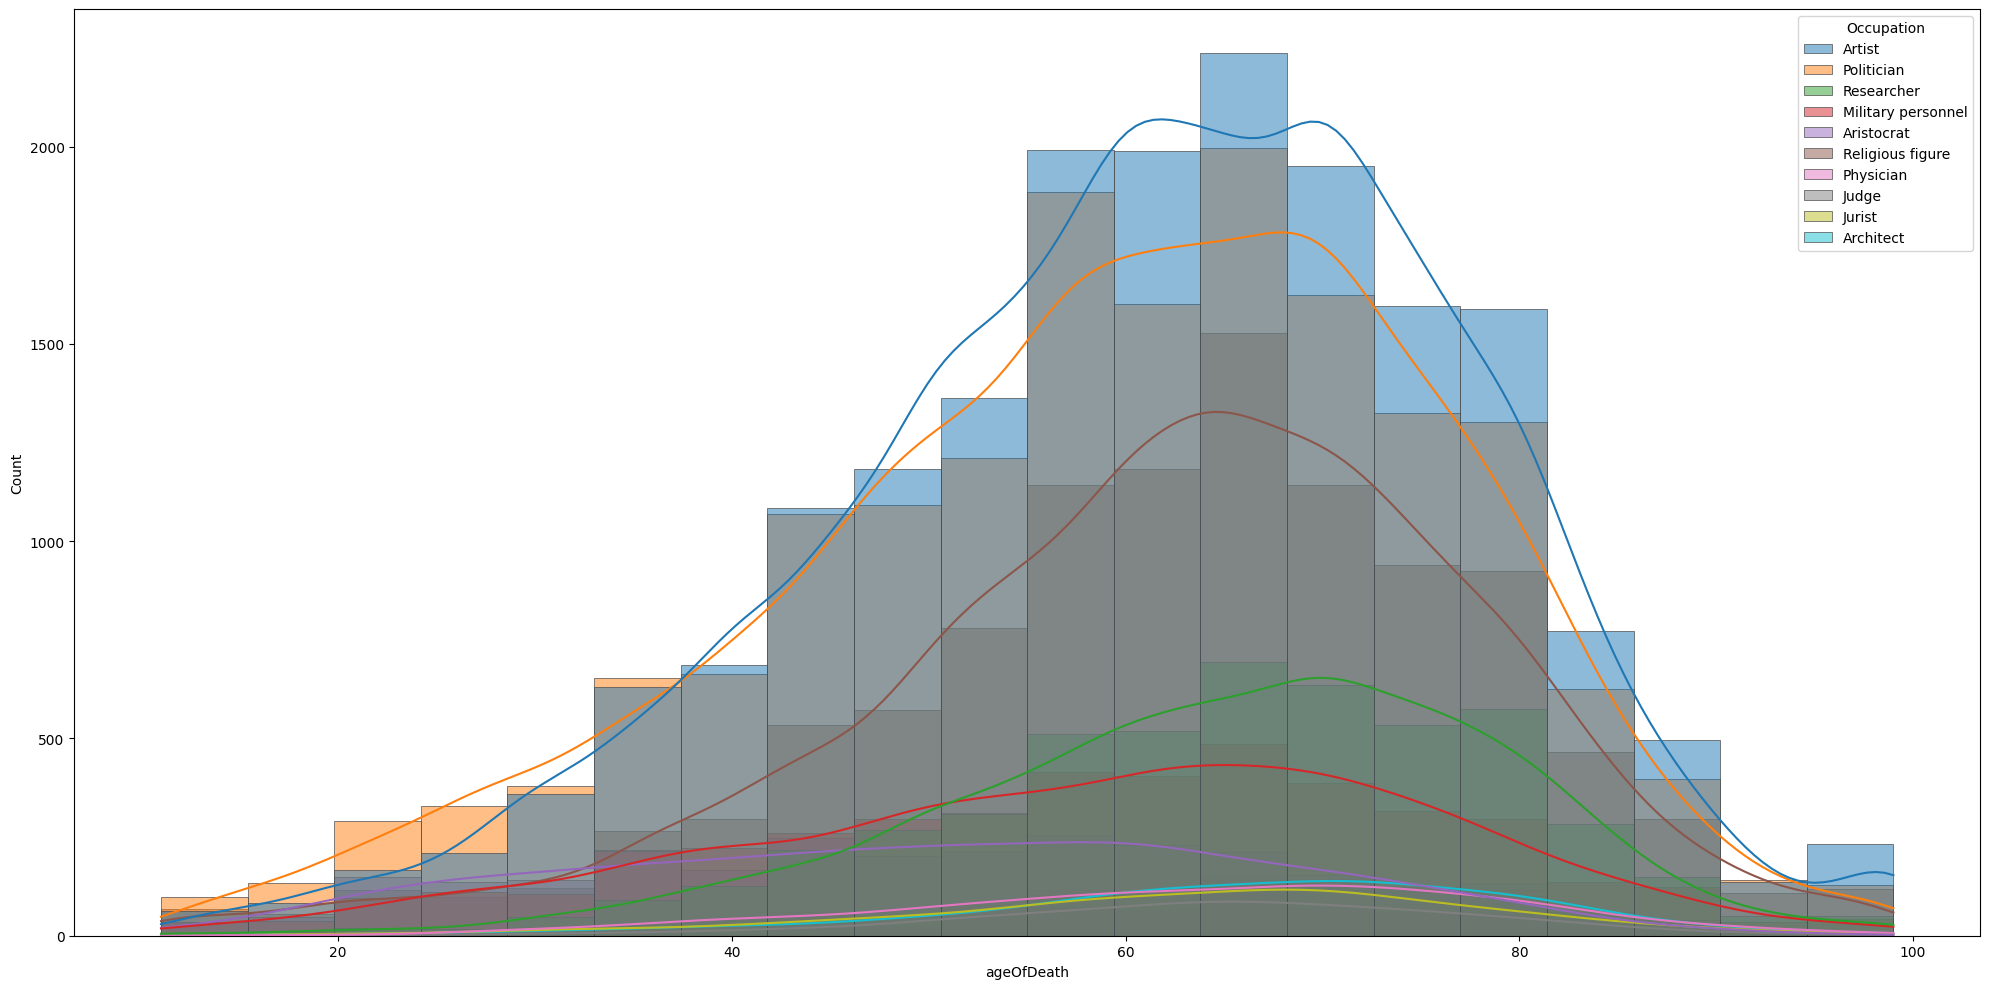

In [178]:
f, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data = occ2_df, x = occ2_df['ageOfDeath'],
             hue = occ2_df['Occupation'], edgecolor=".3", linewidth=.5, bins=20, kde=True)
plt.show()